In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split

if tf.test.is_gpu_available():
    print("yes")
else:
    print("no")


path_save_files = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\EXPERIMENTS\\Model 1\\"


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
yes


In [30]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

predict_paths = []
predict_labels = []
for dirname, _, filenames in os.walk(path + 'savee'):
    for filename in filenames:
        label = filename.split('.')[0]
        label = list(label)

        if label[0] != "n":
            predict_paths.append(os.path.join(dirname, filename))


        if label[0] == 'a':
            predict_labels.append("anger")
        elif label[0] == 'd':
            predict_labels.append("disgust")
        elif label[0] == 'f':
            predict_labels.append("fear")
        elif label[0] == "h":
            predict_labels.append("happiness")
        elif label[0] == "s" and label[1] == "a":
            predict_labels.append("sadness")
        elif label[0] == "s" and label[1] == "u":
            predict_labels.append("surprised")

print('Savee Dataset is loaded')

Savee Dataset is loaded


In [357]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

train_paths = []
train_labels = []
for dirname, _, filenames in os.walk(path + 'tess'):
    for filename in filenames:
        label = filename.split('_')[-1]
        label = label.split('.')[0]

        if label != "neutral" and label != "ps":
            train_paths.append(os.path.join(dirname, filename))

        if label == "angry":
            train_labels.append("anger")
        elif label == "disgust":
            train_labels.append("disgust")
        elif label == "fear":
            train_labels.append("fear")
        elif label == "happy":
            train_labels.append("happiness")
        elif label == "sad":
            train_labels.append("sadness")
        # train_labels.append(label.lower())

print('TESS Toronto Dataset is loaded')

TESS Toronto Dataset is loaded


In [112]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"
#
# train_paths = []
# train_labels = []
intensity = []
for dirname, _, filenames in os.walk(path + 'ravdess'):
    for filename in filenames:

        label = filename.split('-')
        emotion_label = label[2]
        intensity_label = label[3]
        if emotion_label != "01" and emotion_label != "02" and emotion_label != "08":
            train_paths.append(os.path.join(dirname, filename))


        if emotion_label == "03":
            train_labels.append("happiness")
        elif emotion_label == "05":
            train_labels.append("anger")
        elif emotion_label == "07":
            train_labels.append("disgust")
        elif emotion_label == "06":
            train_labels.append("fear")
        elif emotion_label == "04":
            train_labels.append("sadness")


print('RAVDESS Dataset is loaded')

RAVDESS Dataset is loaded


In [113]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

# train_paths = []
# train_labels = []
# intensity = []
for dirname, _, filenames in os.walk(path + "crema-d"):
    for filename in filenames:

        label = filename.split('_')

        if label[2] != "NEU":
            train_paths.append(os.path.join(dirname, filename))

        if label[2] == "HAP":
            train_labels.append("happiness")
        elif label[2] == "ANG":
            train_labels.append("anger")
        elif label[2] == "DIS":
            train_labels.append("disgust")
        elif label[2] == "FEA":
            train_labels.append("fear")
        elif label[2] == "SAD":
            train_labels.append("sadness")


print('CREMA-D  Dataset is loaded')

CREMA-D  Dataset is loaded


In [358]:
train_paths[:10]

['C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bean_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_beg_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bite_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_boat_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datase

In [359]:
train_labels[:10]

['anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger']

In [360]:
# Create a dataframe for the train data
df_train = pd.DataFrame()
df_train['speech'] = train_paths
df_train['label'] = train_labels
df_train.head()
df_train.to_csv(path_save_files + 'data.csv', index=False)

In [361]:
df_train['label'].value_counts()

anger        400
disgust      400
fear         400
happiness    400
sadness      400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

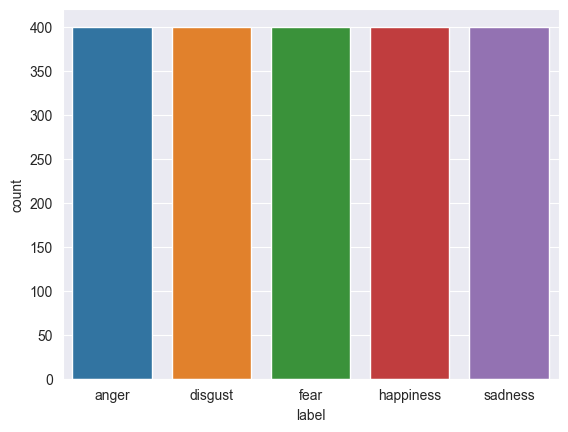

In [362]:
sns.countplot(df_train, x='label')

In [363]:
def waveform(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title("Waveplot for audio with {} emotion".format(emotion), size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()

def spectrogram(data, sample_rate, emotion):

    # stft function converts the data into short term fourier transform
    x = librosa.stft(data)

    # converting the file to decibels
    xdb = librosa.amplitude_to_db(np.abs(x))

    plt.figure(figsize=(11,4))
    plt.title("Spectrogram for audio with {} emotion".format(emotion), size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

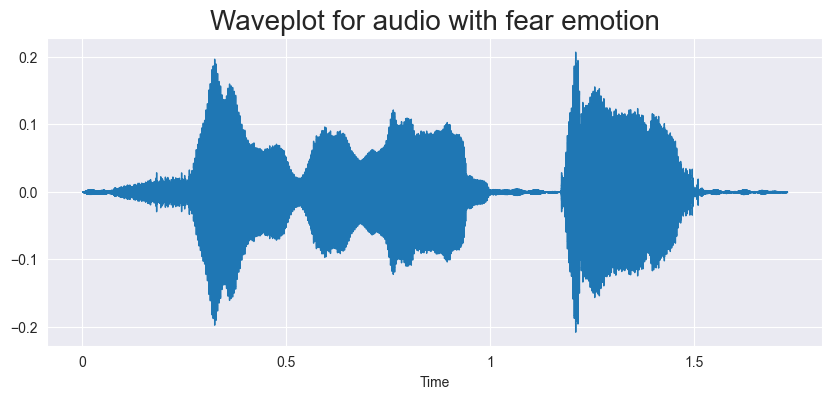

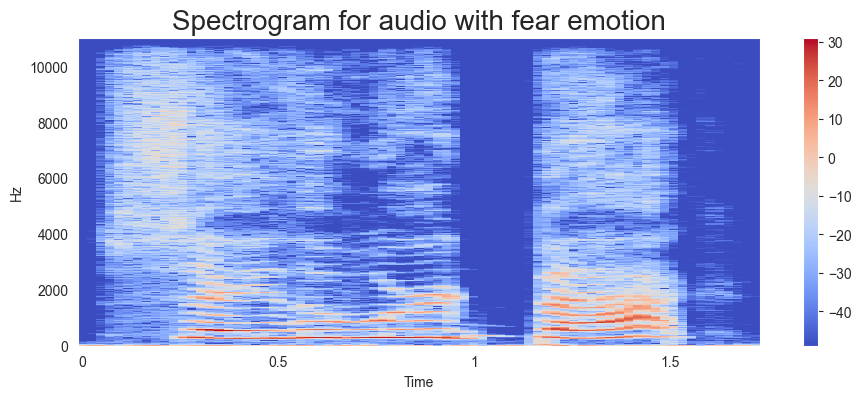

In [364]:
emotion = 'fear'
path = np.array(df_train['speech'][df_train['label'] == emotion])[0]
path

data, sampling_rate = librosa.load(path)
waveform(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [365]:
def extract_ZCR(signal):
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    return zcr

In [366]:
def extract_root_mean_square_value(signal):
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)
    return rms

In [367]:
def extract_mel_spectrogram(signal, sample_rate):
    mel = np.mean(librosa.feature.melspectrogram(y=signal, sr=sample_rate).T, axis=0)
    return mel

In [368]:
def extract_mfcc(signal, sample_rate):
    # signal, sample_rate = librosa.load(file_name, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfcc

In [369]:
def extract_features(sig, sr):

    result = np.array([])

    # We are stacking the features horizontally

    zcr = extract_ZCR(sig)
    mel_spectrogram = extract_mel_spectrogram(sig, sr)
    root_mean_square_value = extract_root_mean_square_value(sig)
    mfcc = extract_mfcc(sig, sr)
    result = np.hstack((result, zcr))
    result = np.hstack((result, mel_spectrogram))
    result = np.hstack((result, root_mean_square_value))
    result = np.hstack((result, mfcc))

    return result

In [370]:
signal, sample_rate =  librosa.load(df_train['speech'][0], duration=5, offset=0.5)
extract_features(signal, sample_rate)

array([ 5.36024306e-02,  4.54478301e-02,  3.73115367e-03,  6.00842875e-04,
        2.93414632e-04,  8.19722307e-04,  1.02949459e-02,  4.36385721e-02,
        8.37457404e-02,  3.87719303e-01,  1.08906674e+00,  3.39006722e-01,
        7.05739530e-03,  3.24997958e-03,  3.91282653e-03,  9.36631113e-03,
        1.71872750e-02,  6.77162707e-02,  7.03126252e-01,  4.09723186e+00,
        1.80011196e+01,  3.56549950e+01,  4.60153437e+00,  1.40354410e-01,
        1.09321184e-01,  1.04042031e-01,  7.08980635e-02,  6.01123907e-02,
        7.88610429e-02,  2.23462611e-01,  7.05154002e-01,  2.34589720e+00,
        1.62208641e+00,  2.01121166e-01,  2.85710365e-01,  4.83757436e-01,
        5.68548262e-01,  5.98788559e-01,  6.47615492e-01,  4.16547060e-01,
        4.06060696e-01,  1.20291233e+00,  3.96928024e+00,  1.84568298e+00,
        2.17189625e-01,  9.64174792e-02,  1.56709611e-01,  2.68666208e-01,
        4.18738395e-01,  3.37618518e+00,  5.72034168e+00,  3.98637652e-01,
        1.57050379e-02,  

In [371]:
def get_features(file_name):

    signal, sample_rate =  librosa.load(file_name, duration=3, offset=0.5)


    result1 = extract_features(signal, sample_rate)
    result = np.array(result1)


    return result

In [372]:
X = df_train['speech'].apply(lambda x: get_features(x))

In [373]:
Y = df_train['label']

In [374]:
len(X), len(Y)

(2000, 2000)

In [375]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv(path_save_files + 'features.csv', index=False)
Features.head(2000)

,speech,labels
0,"[0.05360243055555555, 0.045447830110788345, 0....",anger
1,"[0.05707908163265306, 0.02842741087079048, 0.0...",anger
2,"[0.10601128472222222, 0.02887074649333954, 0.0...",anger
3,"[0.07603963216145833, 0.04499979689717293, 0.0...",anger
4,"[0.043043870192307696, 0.06327962875366211, 0....",anger
...,...,...
1995,"[0.09138671875, 0.21346966922283173, 0.1778962...",sadness
1996,"[0.037143761003521125, 0.023110687732696533, 0...",sadness
1997,"[0.13061197916666667, 0.11610786616802216, 0.0...",sadness
1998,"[0.042146706882911396, 0.1722598522901535, 0.2...",sadness


In [410]:
features = pd.read_csv(path_save_files + 'features.csv')   # converters={'values': lambda x: np.fromstring(x.strip('[]'), sep=',')}
to_array = lambda x: np.array(x.strip('[]').split(), dtype=float)
features['speech'] = features['speech'].apply(to_array)


In [411]:
X = features.iloc[:, :-1].values
# .iloc[:, :-1].values
Y = features['labels'].values


second_x = X
second_y = Y

In [412]:
X.shape

(2000, 1)

In [413]:
X

array([[array([ 5.36024306e-02,  4.54478301e-02,  3.73115367e-03,  6.00842875e-04,
                2.93414632e-04,  8.19722307e-04,  1.02949459e-02,  4.36385721e-02,
                8.37457404e-02,  3.87719303e-01,  1.08906674e+00,  3.39006722e-01,
                7.05739530e-03,  3.24997958e-03,  3.91282653e-03,  9.36631113e-03,
                1.71872750e-02,  6.77162707e-02,  7.03126252e-01,  4.09723186e+00,
                1.80011196e+01,  3.56549950e+01,  4.60153437e+00,  1.40354410e-01,
                1.09321184e-01,  1.04042031e-01,  7.08980635e-02,  6.01123907e-02,
                7.88610429e-02,  2.23462611e-01,  7.05154002e-01,  2.34589720e+00,
                1.62208641e+00,  2.01121166e-01,  2.85710365e-01,  4.83757436e-01,
                5.68548262e-01,  5.98788559e-01,  6.47615492e-01,  4.16547060e-01,
                4.06060696e-01,  1.20291233e+00,  3.96928024e+00,  1.84568298e+00,
                2.17189625e-01,  9.64174792e-02,  1.56709611e-01,  2.68666208e-01,
    

In [414]:
Y

array(['anger', 'anger', 'anger', ..., 'sadness', 'sadness', 'sadness'],
      dtype=object)

In [415]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_train = enc.fit_transform(Y.reshape(-1, 1))

In [416]:
y_train.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [417]:
y_train.shape

(2000, 5)

In [418]:
X = [x[0] for x in X]
X = np.array(X)
# X
X.shape

(2000, 170)

In [419]:
X.shape

(2000, 170)

In [420]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y_train, random_state=95, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1500, 170), (1500, 5), (500, 170), (500, 5))

In [421]:
print(x_test)

[[ 6.45871630e-02  2.55481098e-02  1.40325574e-03 ...  1.43301979e-01
  -7.41746950e+00  1.69068182e+00]
 [ 3.94650021e-02  2.83250622e-02  1.50452936e-02 ...  7.68240118e+00
   1.01539631e+01  1.17267075e+01]
 [ 7.78065557e-02  3.73379304e-03  1.07464625e-03 ... -5.29831457e+00
  -7.42735386e+00  1.66115701e+00]
 ...
 [ 6.55691964e-02  2.67376248e-02  1.75526261e-03 ...  3.65129161e+00
  -5.35478306e+00 -6.10701703e-02]
 [ 5.76953125e-02  4.60148193e-02  3.79998004e-03 ...  3.02560639e+00
  -3.68114662e+00 -6.37666762e-01]
 [ 7.54841549e-02  4.67939116e-03  8.01774790e-04 ...  5.75898218e+00
   5.26818371e+00  5.05919313e+00]]


In [422]:
from sklearn.preprocessing import StandardScaler
import joblib


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

joblib.dump(scaler, path_save_files + "scaler.pk1")

x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1500, 170), (1500, 5), (500, 170), (500, 5))

In [423]:
# Expands data dimension
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1500, 170, 1), (1500, 5), (500, 170, 1), (500, 5))

In [424]:
from keras.layers import LSTM, Dense, Dropout
from keras import Sequential

model=Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 170, 128)          66560     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 202,437
Trainable params: 202,437
Non-trainable params: 0
_________________________________________________________________


In [425]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=0, patience=4, min_lr=0.0000001)

history=model.fit(x_train, y_train.todense(), batch_size=256, epochs=50, validation_data=(x_test, y_test.todense()), callbacks=[rlrp], shuffle=True)

History = pd.DataFrame(history.history)
History.to_csv(path_save_files + 'epochs.csv', index=False)
History.head(2000)

Epoch 1/50
6/6 [==============================] - 6s 236ms/step - loss: 1.5355 - accuracy: 0.4873 - val_loss: 1.3849 - val_accuracy: 0.6040 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 56ms/step - loss: 1.2084 - accuracy: 0.6147 - val_loss: 0.9214 - val_accuracy: 0.6080 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 56ms/step - loss: 0.8732 - accuracy: 0.6533 - val_loss: 0.7375 - val_accuracy: 0.6460 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 55ms/step - loss: 0.7109 - accuracy: 0.6853 - val_loss: 0.5390 - val_accuracy: 0.8020 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 56ms/step - loss: 0.5521 - accuracy: 0.7813 - val_loss: 0.3915 - val_accuracy: 0.8420 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 55ms/step - loss: 0.4482 - accuracy: 0.8147 - val_loss: 0.3418 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 56ms/step - loss: 0.3861 - accurac

,loss,accuracy,val_loss,val_accuracy,lr
0,1.535507,0.487333,1.384929,0.604,0.001000
1,1.208388,0.614667,0.921390,0.608,0.001000
2,0.873157,0.653333,0.737451,0.646,0.001000
3,0.710913,0.685333,0.538985,0.802,0.001000
4,0.552115,0.781333,0.391493,0.842,0.001000
5,0.448250,0.814667,0.341790,0.850,0.001000
6,0.386050,0.851333,0.283627,0.894,0.001000
7,0.327827,0.872000,0.259064,0.902,0.001000
8,0.329422,0.873333,0.238597,0.894,0.001000
9,0.310868,0.872667,0.264438,0.904,0.001000


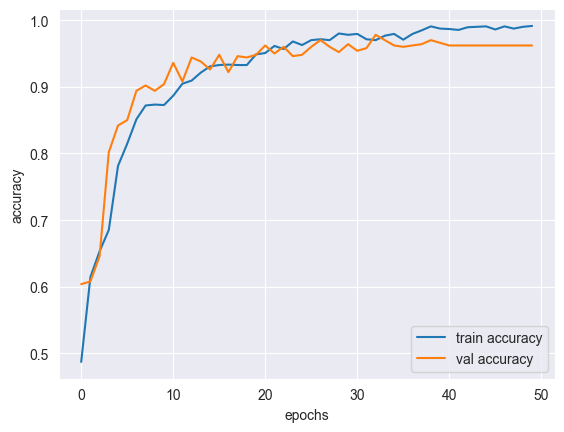

In [426]:
epochs = list(range(50))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.show()
plt.savefig(path_save_files + "accuracy_graph")


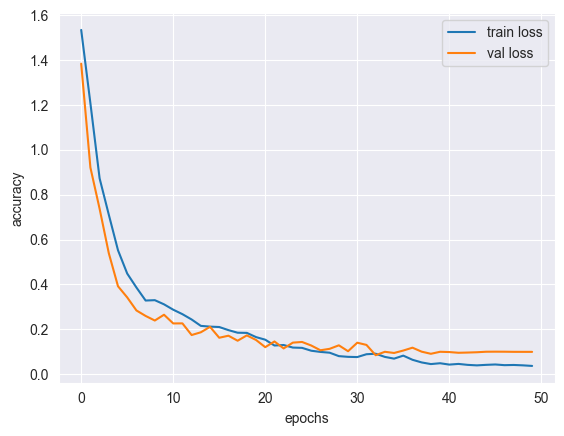

In [427]:

epochs = list(range(50))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.show()

plt.savefig(path_save_files + "loss_graph")


In [394]:
from keras.models import load_model

model = load_model(path_save_files + "training_model_experiment_x.h5")

In [395]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = enc.inverse_transform(pred_test)
y_test = enc.inverse_transform(y_test)

1/1 [==============================] - 1s 1s/step


In [207]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(100)
df.to_csv(path_save_files + 'predictions.csv', index=False)

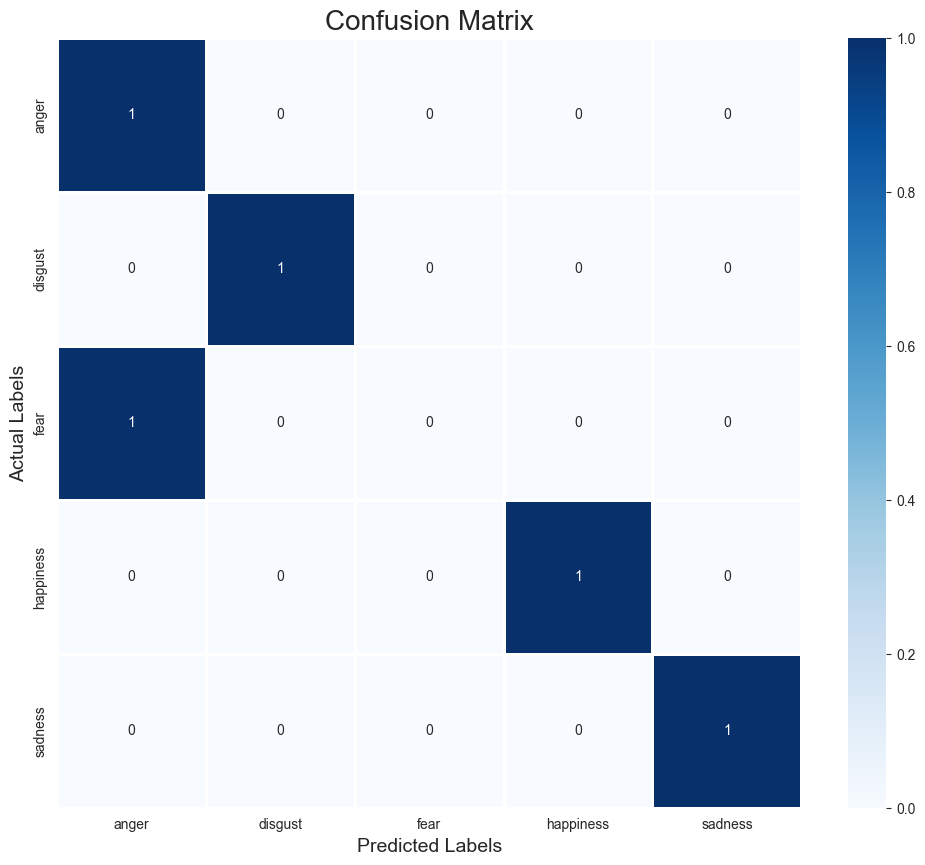

In [208]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
# plt.show()

plt.savefig(path_save_files + "confusion_matrix.png")



In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.50      1.00      0.67         1
     disgust       1.00      1.00      1.00         1
        fear       0.00      0.00      0.00         1
   happiness       1.00      1.00      1.00         1
     sadness       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



C:\Users\night\Desktop\Facultate An 3\Semestru 1\CVDL\Github\Sem5-Computer-Vision-And-Deep-Learning\First implementation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\night\Desktop\Facultate An 3\Semestru 1\CVDL\Github\Sem5-Computer-Vision-And-Deep-Learning\First implementation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\night\Desktop\Facultate An 3\Semestru 1\CVDL\Github\Sem5-Computer-Vision-And-Deep-Learning\First implementation\lib\site-packages\sklearn\metrics\_classification.py:1344

In [194]:
model.save(path_save_files + "training_model_experiment_x.h5")

In [ ]:
model.predict()